In [1]:
from tqdm import tqdm
import json
import glob
import numpy as np
import os
import cv2 as cv
import cv2
import pandas as pd
import PIL.Image, PIL
import matplotlib.pyplot as plt
from PIL import ImageDraw

In [2]:
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import numpy as np
import argparse
import imutils

In [3]:
file_ = "/home/chethana/Datasets/HearshDataLeftRigh/20220131_114220/20220131_114220_left_4.json"

In [4]:
img = cv2.imread(file_.replace(".json", ".png"))

In [5]:
#To get the perpendiculars
def get_ppoints(p1,p2, N=5):
    import math

    (x1,y1) = p1
    (x2,y2) = p2

    vx = x2-x1
    vy = y2-y1

    length = math.sqrt( vx*vx + vy*vy )

    ux = -vy/length
    uy = vx/length

    x3 = float(x1 + N/2 * ux)
    y3 = float(y1 + N/2 * uy)

    x4 = float(x1 - N/2 * ux)
    y4 = float(y1 - N/2 * uy)

    x5 = float(x2 + N/2 * ux)
    y5 = float(y2 + N/2 * uy)

    x6 = float(x2 - N/2 * ux)
    y6 = float(y2 - N/2 * uy)

    pts = [(x3,y3),(x4,y4), (x5,y5), (x6,y6)]
    return pts

In [6]:
#To find the distance between two points
import math
def pixel_dist(p1,p2):
    [(x1,y1),(x2,y2)] = [p1,p2]
    vx = x2-x1
    vy = y2-y1
    length = math.sqrt( vx*vx + vy*vy )
    return length

In [62]:
#to draw polygobns to given pouints
import imutils
def polygons_to_mask(img_shape, polygons):
    mask = np.zeros(img_shape, dtype=np.uint8)
    #converts the mask to a pillow image
    mask = PIL.Image.fromarray(mask)
    
    xy = list(map(tuple, polygons))
    ImageDraw.Draw(mask).polygon(xy=xy, outline=1, fill=0)
    mask = np.array(mask, dtype=bool)
    plt.imshow(mask)
    return mask



In [8]:
def Average(lst):
    return sum(lst) / len(lst)

In [9]:
#To get the contour points at some step size and getting every point's perpendicular
def drawperp(list):
    cnts = []
    for i in range(0,(len(list)-100), 100):
        p1 = list[i]
        p2 = list[i+1]
        pts = get_ppoints(p1,p2, N=100)
        [(x3,y3),(x4,y4), (x5,y5), (x6,y6)] = pts
        cnts.append([(int(x3),int(y3)),(int(x4),int(y4))])
        cnts.append([(int(x5),int(y5)),(int(x6),int(y6))])
        (x1,y1) = p1
        (x2,y2) = p2
    return cnts

In [10]:
#To get the middle points
def getmps(points):
    mps = []
    thicknesses = []
    for x in range(0, len(lines)):
        for x1,y1,x2,y2 in lines[x]:
            dist = pixel_dist((x1,y1),(x2,y2))
            thicknesses.append(dist)
            mp = (int((x2+x1)/2), int((y2+y1)/2))
            mps.append(mp)
            cv2.line(common_pts_msk,(x1,y1),(x2,y2),(255,255,255),2)
            mps = sorted(mps , key=lambda k: [k[1], k[0]])
    return mps, thicknesses

In [11]:
#To Connect all the midpoints
def mpconnect(middlepoints):
    lengths = []
    for i in range(len(mps)-1):
        mp1 = mps[i]
        mp2 = mps[i+1]
        length = pixel_dist(mp1,mp2)
        lengths.append(length)
        cv2.line(common_pts_msk,mp1,mp2,(255,255,255),2)
    plt.figure(figsize=(10,10))
    plt.imshow(common_pts_msk)
    plt.show()
    return lengths

In [12]:
def get_opmask(ctr):
    #       To draw the perpendicular lines
    # Green color in BGR
    color = (255, 255, 255)

    # Line thickness of 9 px
    thickness = 1
    
    op_mask = np.zeros([height,width])
    for [sp,ep] in cnts: #xys for json points
            op_mask = cv2.line(op_mask, sp, ep, color, thickness)
    return op_mask

0 trunk


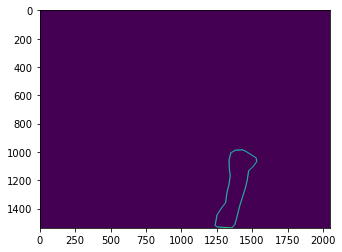

3 spur
Height of spur is :  327


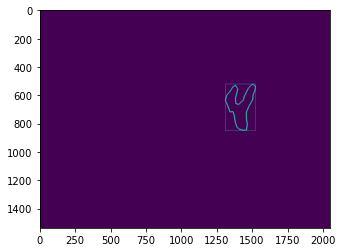

4 spur
Height of spur is :  142


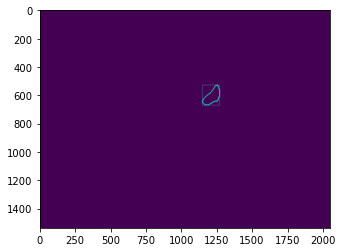

5 spur
Height of spur is :  327


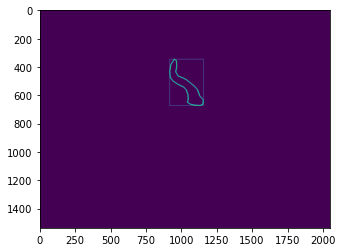

6 spur
Height of spur is :  158


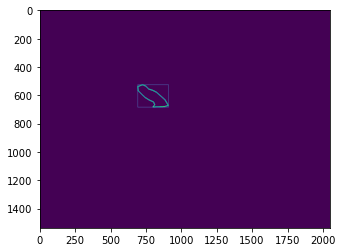

7 spur
Height of spur is :  110


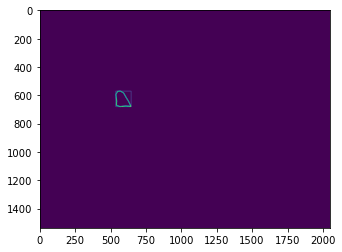

8 spur
Height of spur is :  242


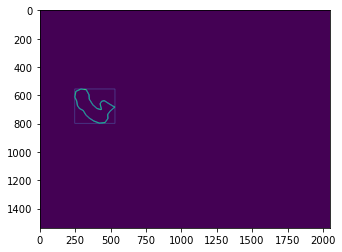

9 spur
Height of spur is :  339


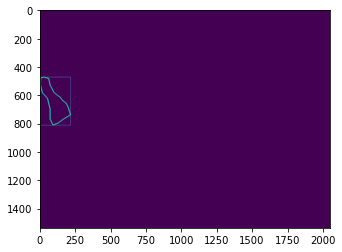

10 cane
Ditsance between the can and the trunk is:  1051.1441385461844


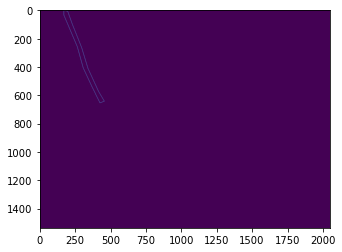

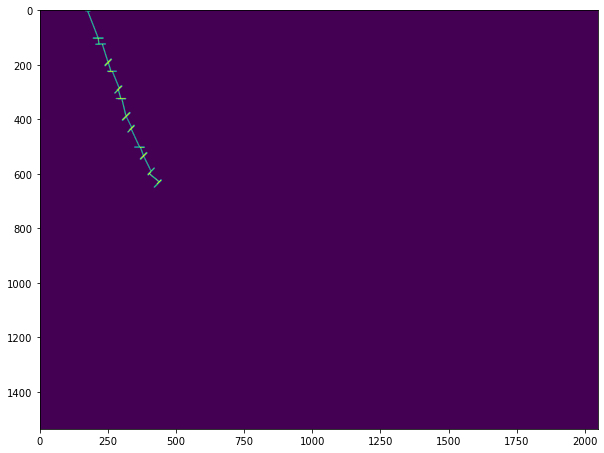

The Thickness of the cane is :  29.28495989810785
The Length of the cane in pixels is :  720.4980905819255
Area of the mask is:  20260.0
11 cane
Ditsance between the can and the trunk is:  973.7355903940248


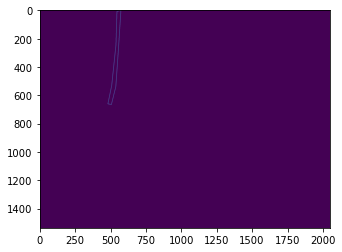

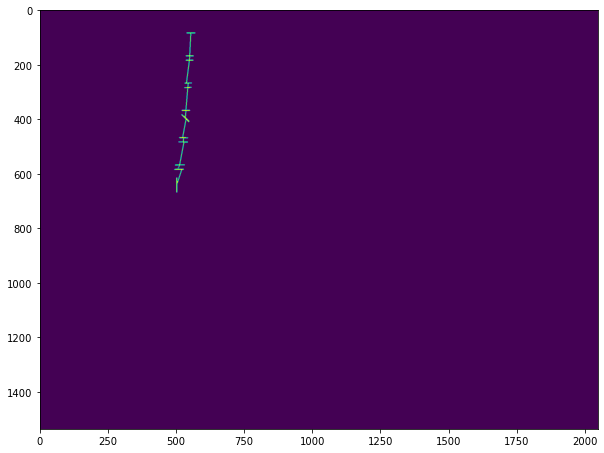

The Thickness of the cane is :  27.791810756792703
The Length of the cane in pixels is :  598.4797664064729
Area of the mask is:  16411.0
12 cane
Ditsance between the can and the trunk is:  851.1850562598006


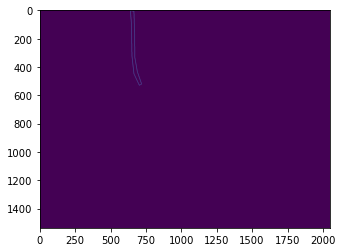

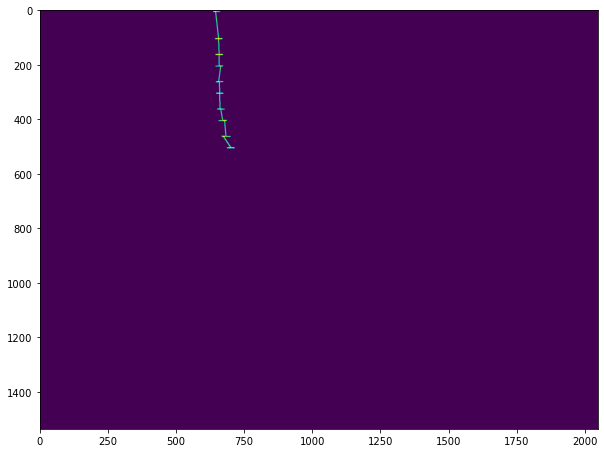

The Thickness of the cane is :  22.356745241946218
The Length of the cane in pixels is :  537.661321825721
Area of the mask is:  11493.0
13 cane
Ditsance between the can and the trunk is:  1245.6648827032093


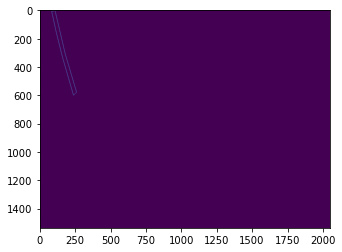

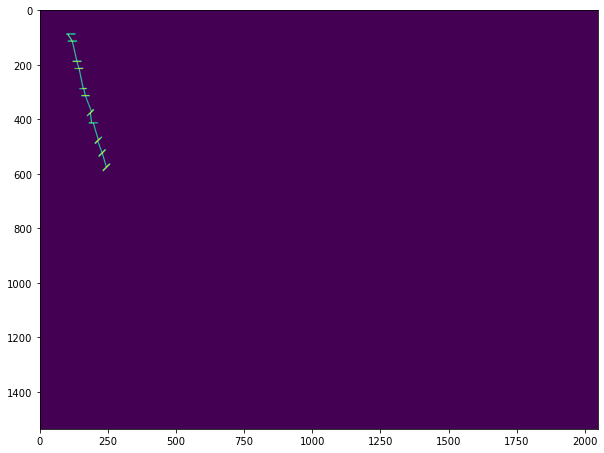

The Thickness of the cane is :  27.86824879812481
The Length of the cane in pixels is :  545.3583173006406
Area of the mask is:  15546.0
14 cane
Ditsance between the can and the trunk is:  1242.919949151996


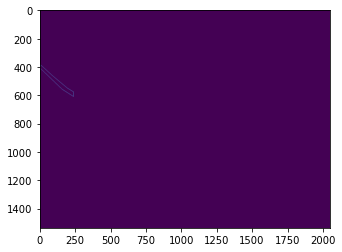

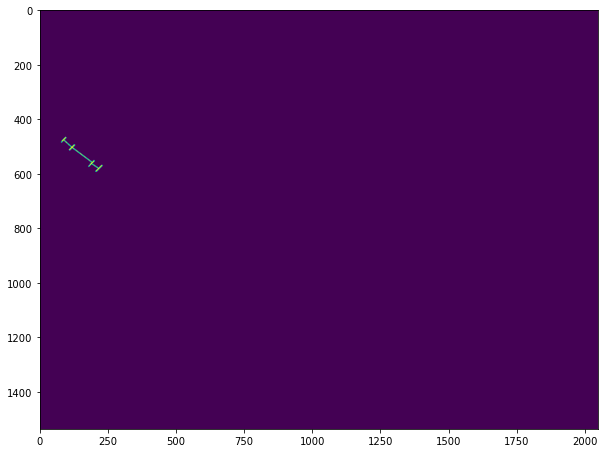

The Thickness of the cane is :  25.986174208605618
The Length of the cane in pixels is :  176.58819251781455
Area of the mask is:  7418.5
15 cane
Ditsance between the can and the trunk is:  1323.4810161086557


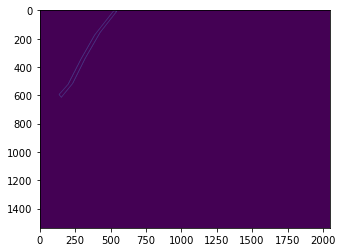

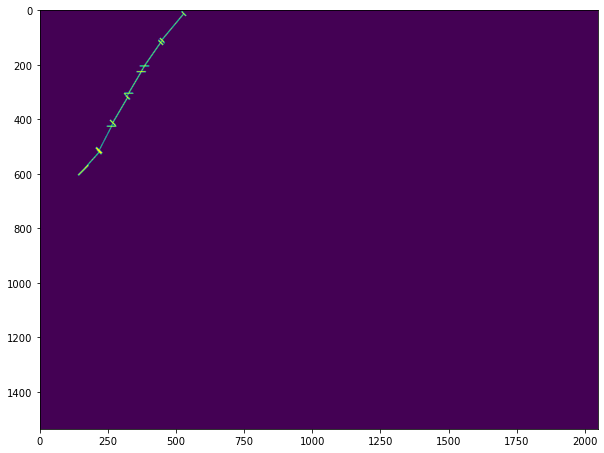

The Thickness of the cane is :  28.48634244180978
The Length of the cane in pixels is :  694.718115041636
Area of the mask is:  16330.5
16 cane
Ditsance between the can and the trunk is:  1363.8493318545125


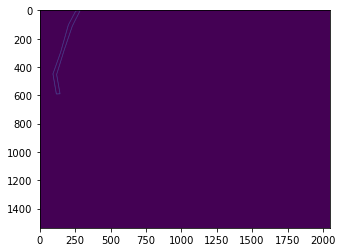

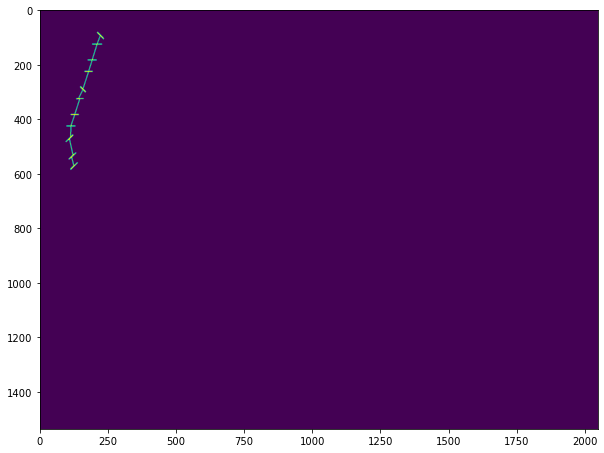

The Thickness of the cane is :  28.249138484271626
The Length of the cane in pixels is :  520.5764761175358
Area of the mask is:  15218.0
17 cane
Ditsance between the can and the trunk is:  1476.954298548198


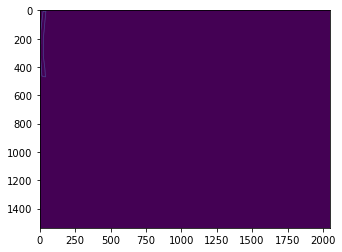

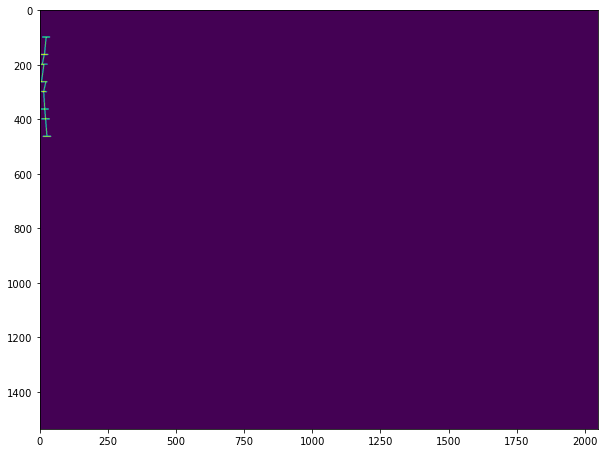

The Thickness of the cane is :  21.89060476431315
The Length of the cane in pixels is :  389.43526759610904
Area of the mask is:  9744.0
18 cane
Ditsance between the can and the trunk is:  967.3231104444884


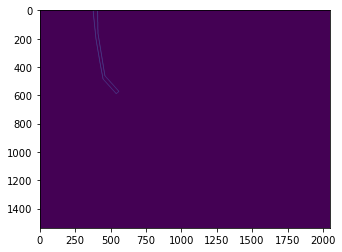

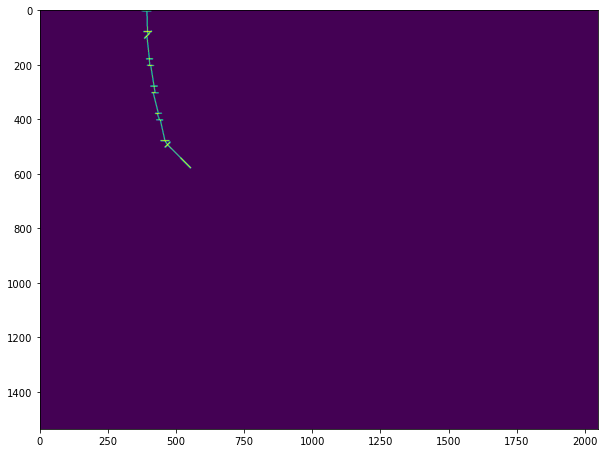

The Thickness of the cane is :  27.012046377753595
The Length of the cane in pixels is :  615.4161816205215
Area of the mask is:  13598.0
19 cane
Ditsance between the can and the trunk is:  1101.9637017615416


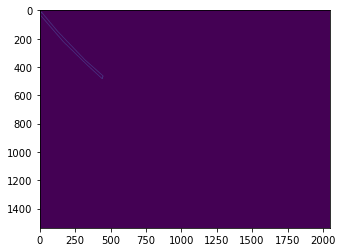

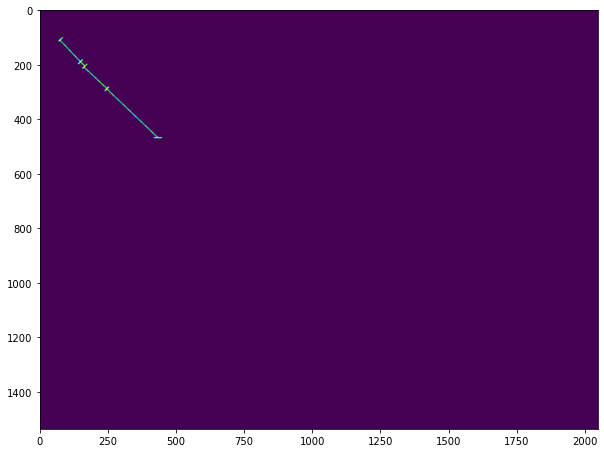

The Thickness of the cane is :  20.06639969244288
The Length of the cane in pixels is :  519.6604558920133
Area of the mask is:  11245.0
20 cane
Ditsance between the can and the trunk is:  843.6895163506538


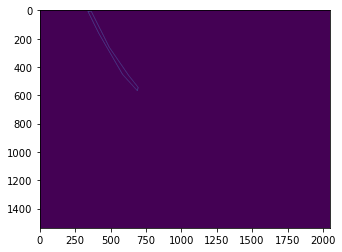

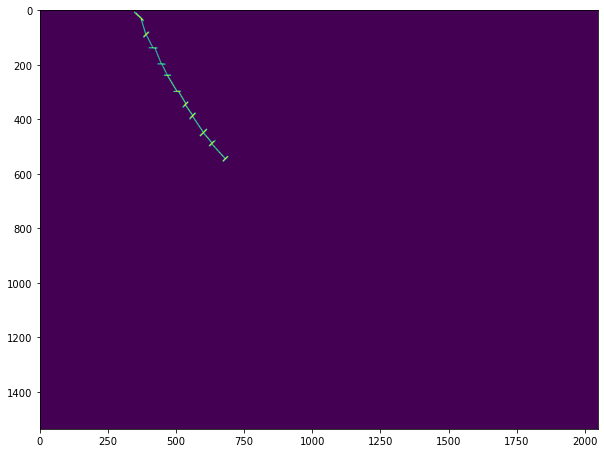

The Thickness of the cane is :  23.484221847408065
The Length of the cane in pixels is :  644.1693453642032
Area of the mask is:  14394.0
21 cane
Ditsance between the can and the trunk is:  680.7620729741045


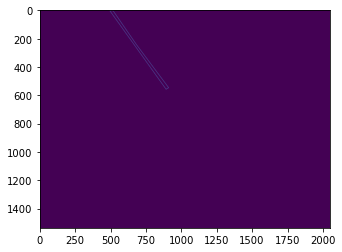

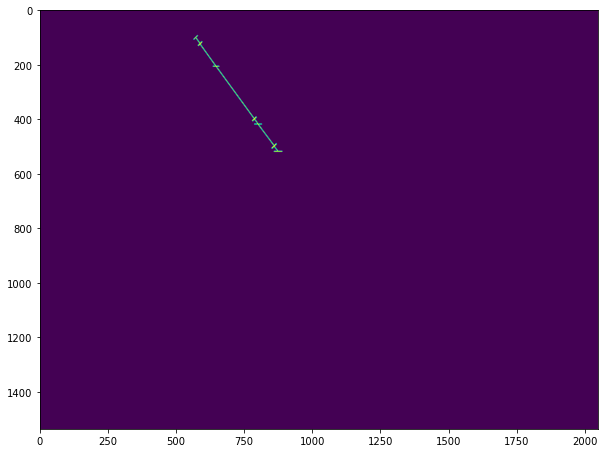

The Thickness of the cane is :  22.647796633639192
The Length of the cane in pixels is :  516.884524865245
Area of the mask is:  11312.0
22 cane
Ditsance between the can and the trunk is:  773.1655708837532


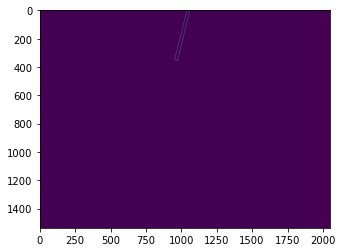

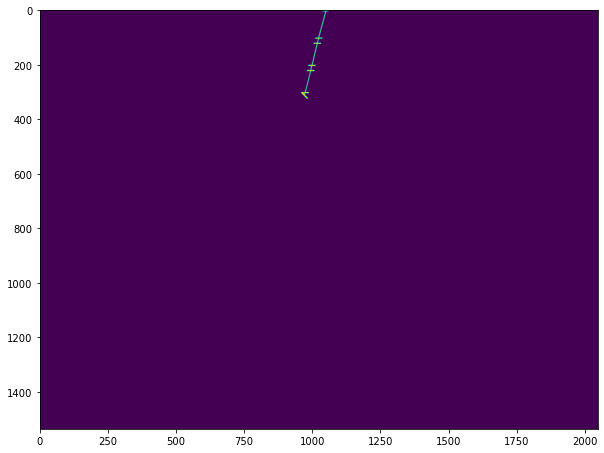

The Thickness of the cane is :  25.20249851597655
The Length of the cane in pixels is :  323.6607476569676
Area of the mask is:  7507.5
23 cane
Ditsance between the can and the trunk is:  486.5757906020397


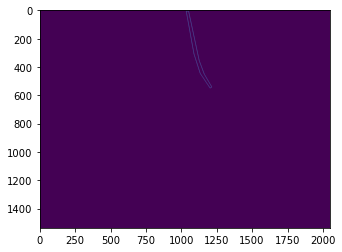

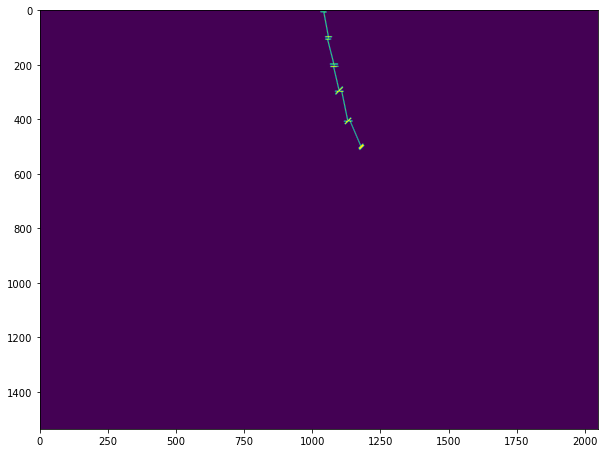

The Thickness of the cane is :  23.455424735086922
The Length of the cane in pixels is :  536.3947405458501
Area of the mask is:  12021.5
24 cane
Ditsance between the can and the trunk is:  584.9726489332643


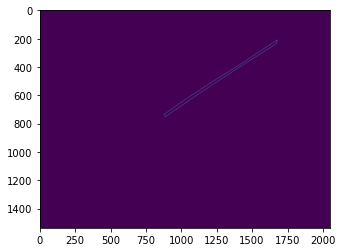

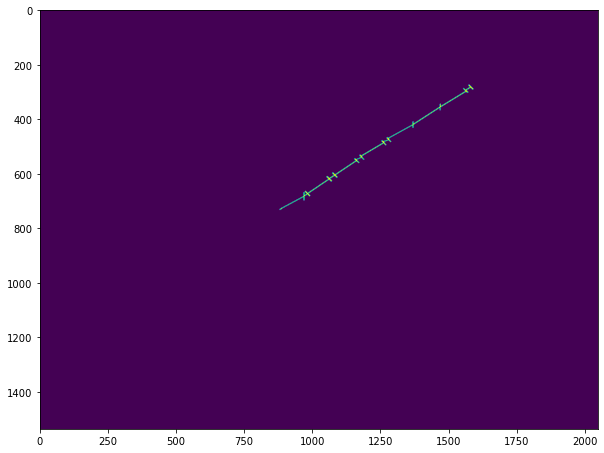

The Thickness of the cane is :  19.554588916275076
The Length of the cane in pixels is :  863.3085165593469
Area of the mask is:  16521.5
25 cane
Ditsance between the can and the trunk is:  476.366455578056


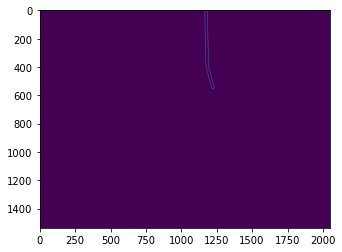

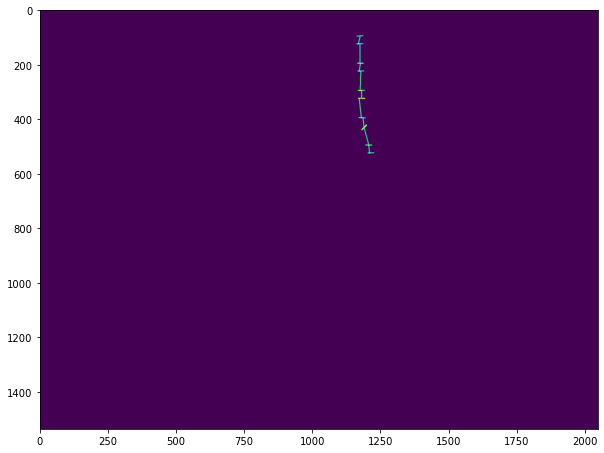

The Thickness of the cane is :  18.51001448006295
The Length of the cane in pixels is :  478.48299981459866
Area of the mask is:  10172.0
26 cane
Ditsance between the can and the trunk is:  276.65321252427196


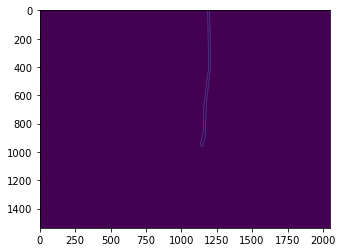

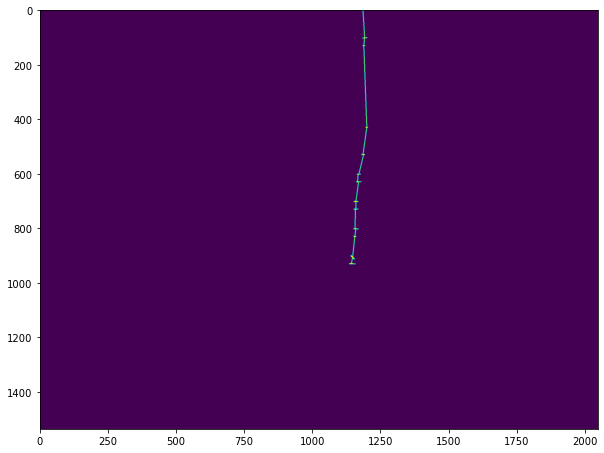

The Thickness of the cane is :  11.95651731429596
The Length of the cane in pixels is :  948.5018336463895
Area of the mask is:  14694.5
27 cane
Ditsance between the can and the trunk is:  457.6647244435603


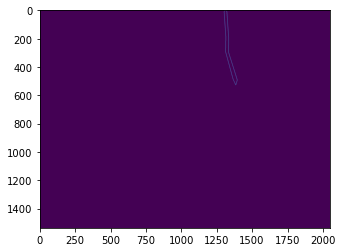

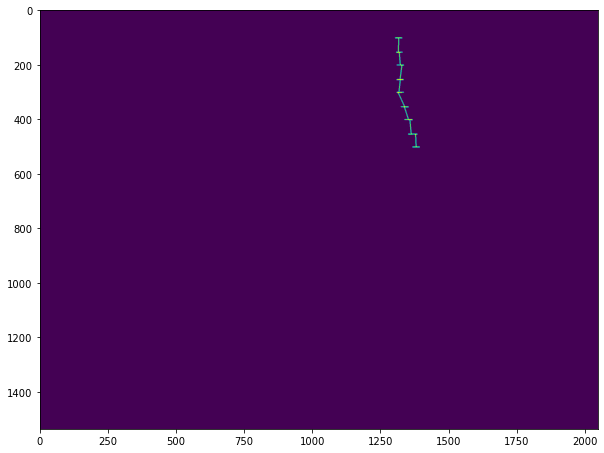

The Thickness of the cane is :  18.819821480737957
The Length of the cane in pixels is :  482.38406423167356
Area of the mask is:  10991.0
28 cane
Ditsance between the can and the trunk is:  427.5160815688692


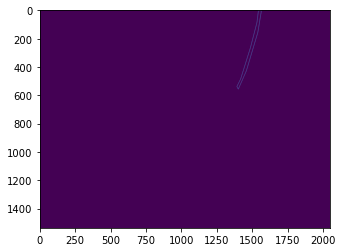

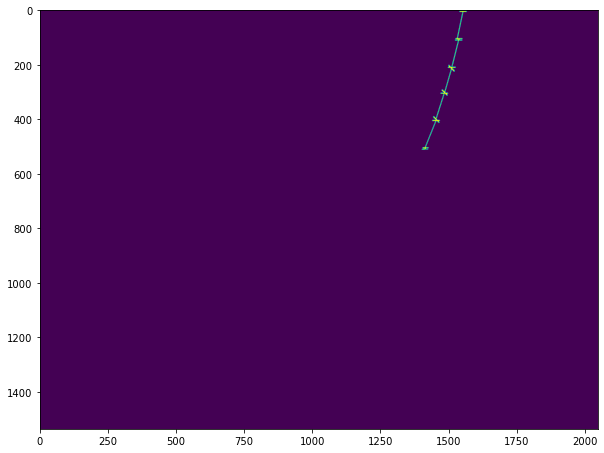

The Thickness of the cane is :  23.623105659251642
The Length of the cane in pixels is :  539.2245041683785
Area of the mask is:  11058.0
29 cane
Ditsance between the can and the trunk is:  462.8541887030947


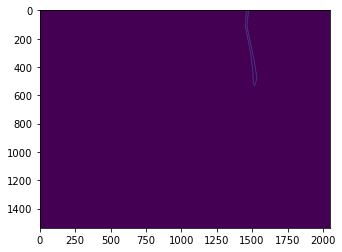

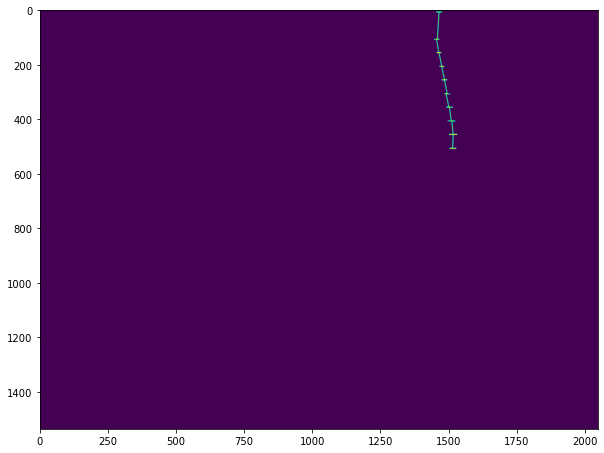

The Thickness of the cane is :  18.758561780355873
The Length of the cane in pixels is :  516.336916721846
Area of the mask is:  8333.5
30 cane
Ditsance between the can and the trunk is:  446.52099614687774


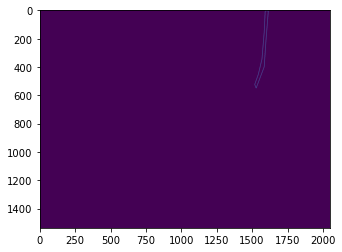

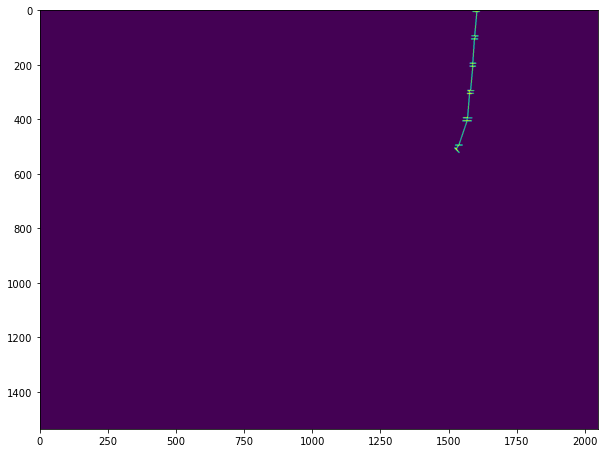

The Thickness of the cane is :  22.04083576659436
The Length of the cane in pixels is :  541.741752555747
Area of the mask is:  10755.5
31 cane
Ditsance between the can and the trunk is:  641.5800807381726


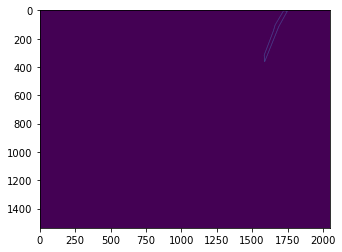

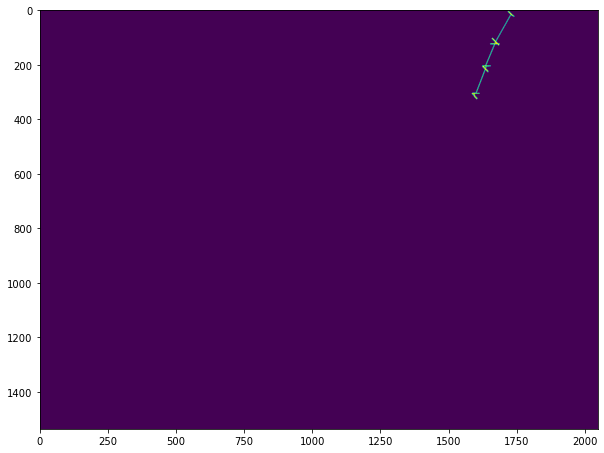

The Thickness of the cane is :  25.776332776770108
The Length of the cane in pixels is :  350.1972510803969
Area of the mask is:  8750.0
32 cane
Ditsance between the can and the trunk is:  459.3647787978525


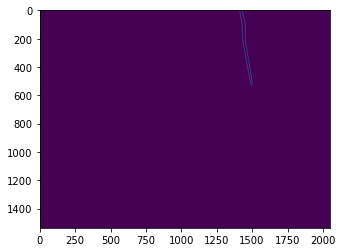

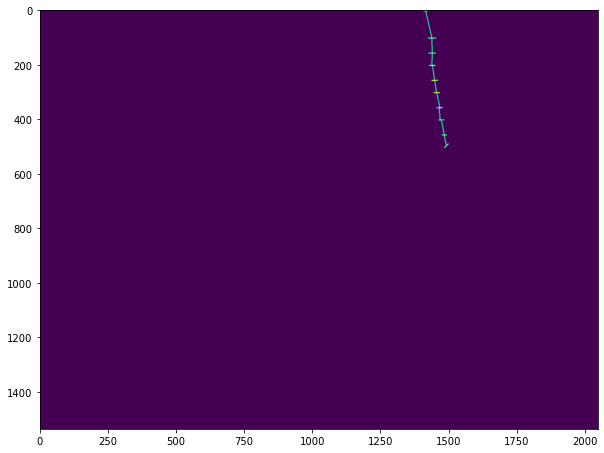

The Thickness of the cane is :  20.2713366775287
The Length of the cane in pixels is :  508.5912854286139
Area of the mask is:  9079.5
33 cane
Ditsance between the can and the trunk is:  515.9864339301955


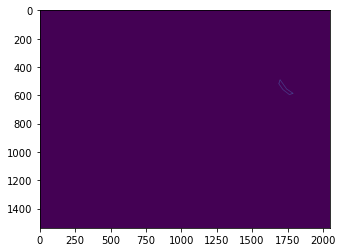

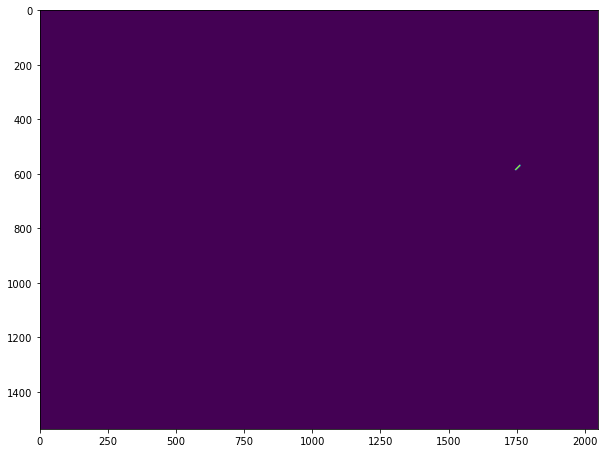

The Thickness of the cane is :  23.33452377915607
The Length of the cane in pixels is :  2.23606797749979
Area of the mask is:  2674.0
34 spur
Height of spur is :  260


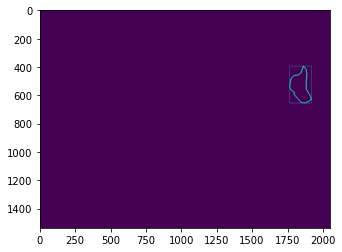

35 spur
Height of spur is :  83


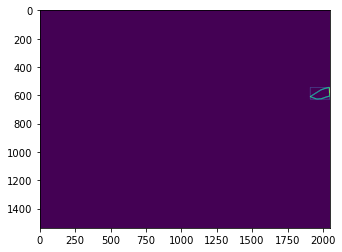

36 cane
Ditsance between the can and the trunk is:  732.7980622245121


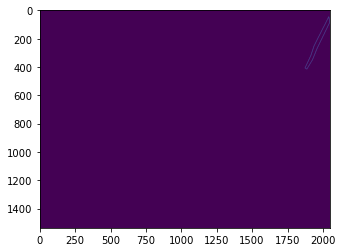

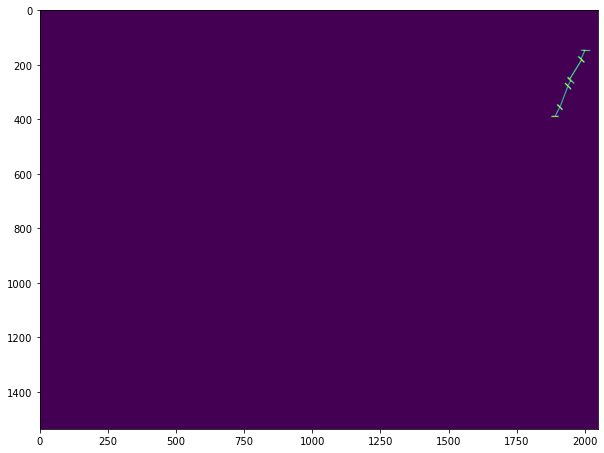

The Thickness of the cane is :  25.144453498396288
The Length of the cane in pixels is :  278.9596903650964
Area of the mask is:  9139.5
37 cane
Ditsance between the can and the trunk is:  594.8108943185221


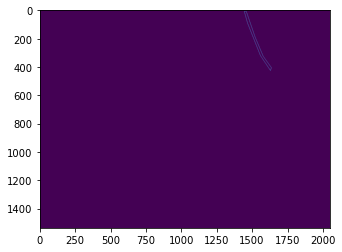

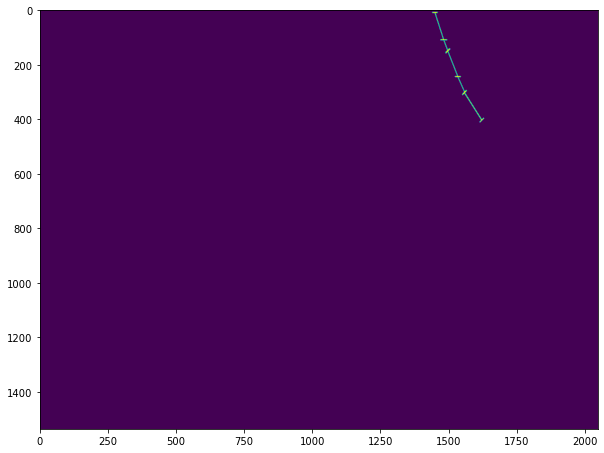

The Thickness of the cane is :  19.91267216164587
The Length of the cane in pixels is :  433.9162025456697
Area of the mask is:  6892.0
38 cane
Ditsance between the can and the trunk is:  283.6212262860451


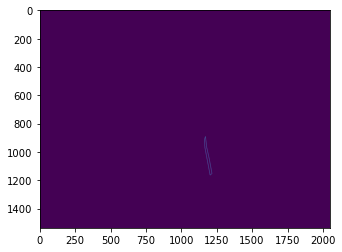

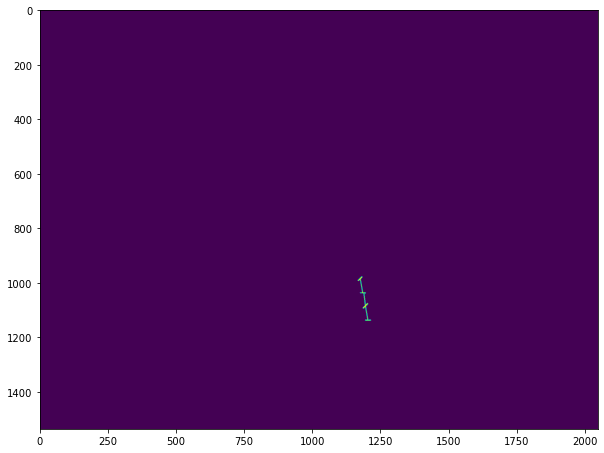

The Thickness of the cane is :  18.887909923620107
The Length of the cane in pixels is :  158.37170353409405
Area of the mask is:  3553.0


In [85]:
img = cv2.imread(file_.replace(".json", ".png"))
# print(img.shape)
gt_f = open(file_)
gtdata = json.load(gt_f)

height, width = gtdata['imageHeight'], gtdata['imageWidth']
img_id = gtdata['imagePath']
gt_cane_mask = np.zeros([height,width])
gt_spur_mask = np.zeros([height,width])
gt_img_mask = np.zeros([height, width])
gt_trunk_mask = np.zeros([height, width])
gt_maincordon_mask = np.zeros([height, width])

contour_points = []
tcontour_points = []
scontour_points = []
for shape_no, shape in enumerate(gtdata['shapes']):
    label = shape['label']
    points = shape['points']
    if len(points)>2 and label == 'cane':
        print(shape_no, label)
        mask = polygons_to_mask((height,width), points)
        mask = mask.clip(0, 255).astype("uint8")
        cane_contour_pts = cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE )[0][0]
        area = cv2.contourArea(cane_contour_pts)
        im = cv2.drawContours(mask,cane_contour_pts,-1,(155,155,150),3)
        contour_points.append(cane_contour_pts)
        gt_cane_mask += mask

        bottom = tuple(cane_contour_pts[cane_contour_pts[:, :, 1].argmax()][0])
        p3,p4 = bottom
        
        print("Ditsance between the can and the trunk is: ", pixel_dist(top,bottom))

#         plt.plot([p1,p3], [p2,p4])
#         plt.show()
        
        cnt_points = cane_contour_pts.tolist()
        cnt_list = [item for sublist in cnt_points for item in sublist]
        cnts = drawperp(cnt_list)
        
        cane_filled_mask = cv2.fillPoly(mask, pts = [cane_contour_pts], color =(255,255,255))
        op_mask = get_opmask(cnts)
            
            
        # To get the common region to the canes and the normal        
        common_pts=(cane_filled_mask != 0) & (op_mask!=0)
        common_pts_msk = common_pts.clip(0, 255).astype("uint8")
        
        #To get houghlines
        minLineLength = 5
        maxLineGap = 2
        lines = cv2.HoughLinesP(common_pts_msk,1,np.pi/180,15,minLineLength=minLineLength,maxLineGap=maxLineGap)
        mps, thicknesses = getmps(lines)
        lengths = mpconnect(mps)
        print("The Thickness of the cane is : ", Average(thicknesses))
        print("The Length of the cane in pixels is : ", sum(lengths))
        
        
        print("Area of the mask is: ",area)
        
        
        
    if len(points)>2 and label == 'trunk':
        print(shape_no, label)
        mask = polygons_to_mask((height,width), points)
        mask = mask.clip(0, 255).astype("uint8")
        trunk_contour_pts = cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE )[0][0]
        area = cv2.contourArea(cane_contour_pts)
        im = cv2.drawContours(mask,trunk_contour_pts,-1,(155,155,150),3)
        tcontour_points.append(trunk_contour_pts)
        gt_trunk_mask += mask
        
        top = tuple(trunk_contour_pts[trunk_contour_pts[:, :, 1].argmin()][0])
        p1,p2 = top 
        
        plt.imshow(mask)
        plt.show()
        
        
    if len(points)>2 and label == 'spur':
        print(shape_no, label)
        mask = polygons_to_mask((height,width), points)
        mask = mask.clip(0, 255).astype("uint8")
        spur_contour_pts = cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE )[0][0]
        area = cv2.contourArea(cane_contour_pts)
        im = cv2.drawContours(mask,spur_contour_pts,-1,(155,155,150),3)
        scontour_points.append(spur_contour_pts)
        gt_spur_mask += mask
        
        x,y,w,h = cv2.boundingRect(spur_contour_pts)
        cv2.rectangle(mask, (x,y), (x+w, y+h), (155,155,150), 1)
        print("Height of spur is : ", h)
        
        plt.imshow(mask)
        plt.show()
        
